# Joining Temperature Data

In [50]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
#Reading mean temperature data dowloaded from ECAD
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df_temp = pd.read_csv(os.path.join(p_cwd,"data","temperature_data","TG_STAID004089.txt"), names = ['souid', 'date', 'tg', 'q_tg'], 
                 header=0, parse_dates=['date'] )

In [52]:
df_temp.drop(['souid', 'q_tg'], axis=1, inplace=True)

In [53]:
df_temp['tg']=df_temp['tg']/10

In [54]:
df_temp=df_temp.set_index('date')

In [55]:
df_temp

,tg
date,
2008-04-01,9.3
2008-04-02,6.6
2008-04-03,4.3
2008-04-04,4.4
2008-04-05,5.9
...,...
2021-04-26,7.7
2021-04-27,9.3
2021-04-28,12.1


In [56]:
df_monthly_mean = df_temp.groupby(pd.Grouper(freq='M')).mean()

In [57]:
df_monthly_mean['monthly_mean']=df_monthly_mean['tg']

In [58]:
df_monthly_mean.drop(['tg'], axis=1, inplace=True)

In [59]:
df_monthly_mean

,monthly_mean
date,
2008-04-30,8.173333
2008-05-31,14.887097
2008-06-30,17.760000
2008-07-31,17.970968
2008-08-31,17.819355
...,...
2020-12-31,1.193548
2021-01-31,-0.700000
2021-02-28,2.628571


In [60]:
df_monthly_mean=df_monthly_mean.resample('D').bfill()

In [61]:
df_monthly_mean

,monthly_mean
date,
2008-04-30,8.173333
2008-05-01,14.887097
2008-05-02,14.887097
2008-05-03,14.887097
2008-05-04,14.887097
...,...
2021-04-26,6.870000
2021-04-27,6.870000
2021-04-28,6.870000


In [62]:
df_weather = df_temp.join(df_monthly_mean)

In [63]:
df_weather

,tg,monthly_mean
date,,
2008-04-01,9.3,NaN
2008-04-02,6.6,NaN
2008-04-03,4.3,NaN
2008-04-04,4.4,NaN
2008-04-05,5.9,NaN
...,...,...
2021-04-26,7.7,6.87
2021-04-27,9.3,6.87
2021-04-28,12.1,6.87


In [64]:
df_weather.index

DatetimeIndex(['2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04',
               '2008-04-05', '2008-04-06', '2008-04-07', '2008-04-08',
               '2008-04-09', '2008-04-10',
               ...
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='date', length=4778, freq=None)

In [65]:
df_weather.fillna(6.87)

,tg,monthly_mean
date,,
2008-04-01,9.3,6.87
2008-04-02,6.6,6.87
2008-04-03,4.3,6.87
2008-04-04,4.4,6.87
2008-04-05,5.9,6.87
...,...,...
2021-04-26,7.7,6.87
2021-04-27,9.3,6.87
2021-04-28,12.1,6.87


In [66]:
df = pd.read_csv(os.path.join(p_cwd, "data","barley_data","ergolding_data.csv"), parse_dates=['date'])

In [67]:
df.drop(['provider_id','lon','lat','alt','alt_dem','gss_id','genus','species','subspecies','affected_flag','qc_flag','qc_ori_flag'], axis=1, inplace=True)

In [68]:
df_winter =df[df['cult_season']==2]

In [69]:
df_winter.drop(['cult_season'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
df_winter.dtypes

s_id                 int64
phase_id             int64
year                 int64
day                  int64
date        datetime64[ns]
dtype: object

In [71]:
df_all = df_winter.merge(df_weather, left_on='date', right_on='date', how='inner')

In [72]:
df_all.dtypes

s_id                     int64
phase_id                 int64
year                     int64
day                      int64
date            datetime64[ns]
tg                     float64
monthly_mean           float64
dtype: object

In [73]:
df_all['s_id']=df_all['s_id'].astype("category")

In [74]:
df_all['phase_id']=df_all['phase_id'].astype("category")

In [75]:
df_all['phase_id'].unique().tolist()

[85, 100, 0, 10, 31, 51]

In [76]:
df_all.dtypes

s_id                  category
phase_id              category
year                     int64
day                      int64
date            datetime64[ns]
tg                     float64
monthly_mean           float64
dtype: object

In [77]:
df_all.drop(['s_id','date'], axis=1, inplace=True)

In [78]:
df_all[df_all['phase_id']==100]

,phase_id,year,day,tg,monthly_mean
1,100,2010,198,20.8,20.403226
6,100,2011,197,17.8,16.151613
10,100,2012,205,16.2,18.341935
16,100,2013,203,23.2,20.893548
22,100,2014,186,19.9,18.870968
28,100,2015,187,25.2,21.741935
34,100,2016,189,18.2,19.500000
40,100,2017,193,18.6,19.419355
46,100,2018,173,11.9,18.126667
52,100,2019,186,21.2,20.312903


In [79]:
df_all.sort_values(by='year')

,phase_id,year,day,tg,monthly_mean
60,10,2008,300,3.6,9.012903
59,0,2008,284,9.9,9.012903
58,100,2008,191,14.9,17.970968
57,85,2008,174,24.7,17.760000
56,51,2008,141,9.0,14.887097
...,...,...,...,...,...
53,0,2019,273,15.0,14.710000
52,100,2019,186,21.2,20.312903
51,85,2019,172,18.9,20.810000
50,51,2019,129,11.3,11.125806


## Analysis of the harvest data (phase:100(5))

In [80]:
df_harvest = df_all[df_all['phase_id']==100]

In [81]:
df_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
df_harvest.sort_values(by='year')

,year,day,tg,monthly_mean
58,2008,191,14.9,17.970968
64,2009,198,21.1,18.309677
1,2010,198,20.8,20.403226
6,2011,197,17.8,16.151613
10,2012,205,16.2,18.341935
16,2013,203,23.2,20.893548
22,2014,186,19.9,18.870968
28,2015,187,25.2,21.741935
34,2016,189,18.2,19.500000
40,2017,193,18.6,19.419355


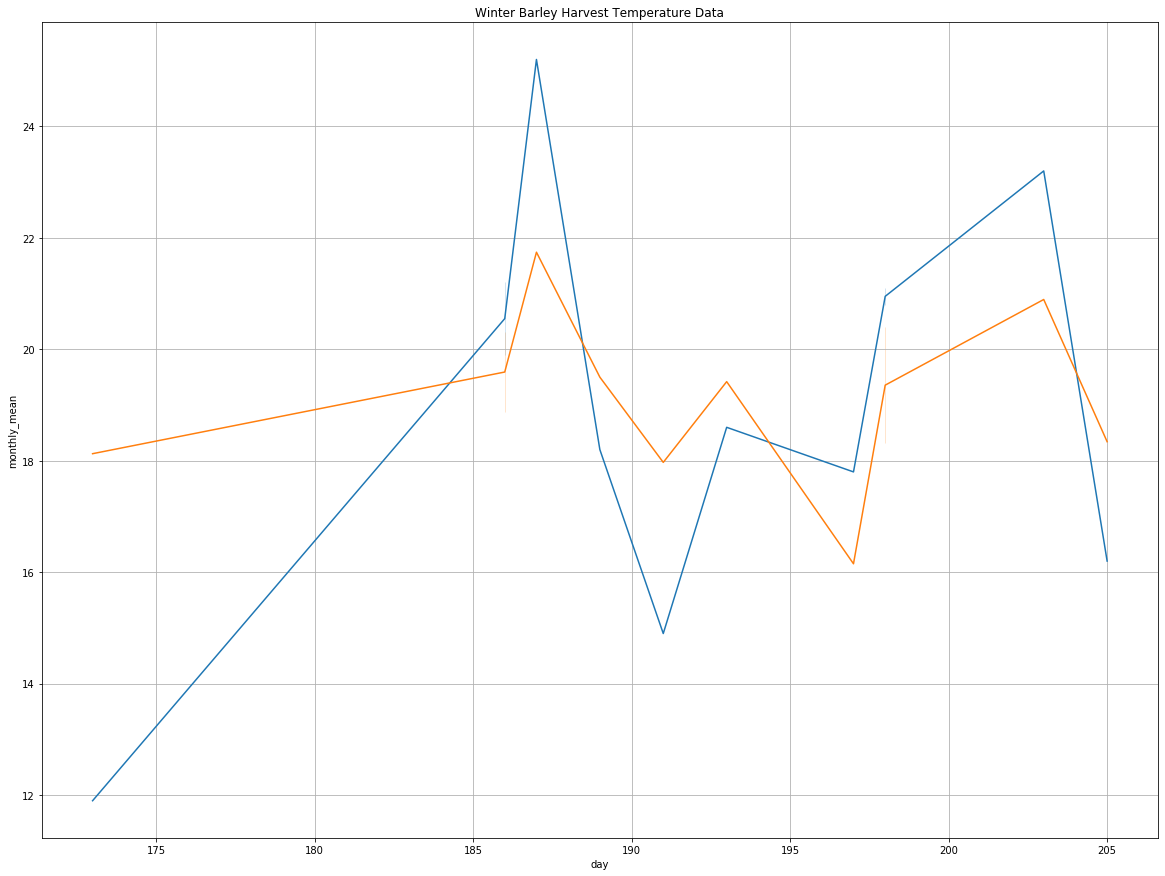

In [126]:
fig = plt.figure(figsize=(20,15))
plt.title("Winter Barley Harvest Temperature Data")
plt.grid()
sns.lineplot(x=df_harvest['day'],y=df_harvest['tg'])
sns.lineplot(x=df_harvest['day'],y=df_harvest['monthly_mean']);

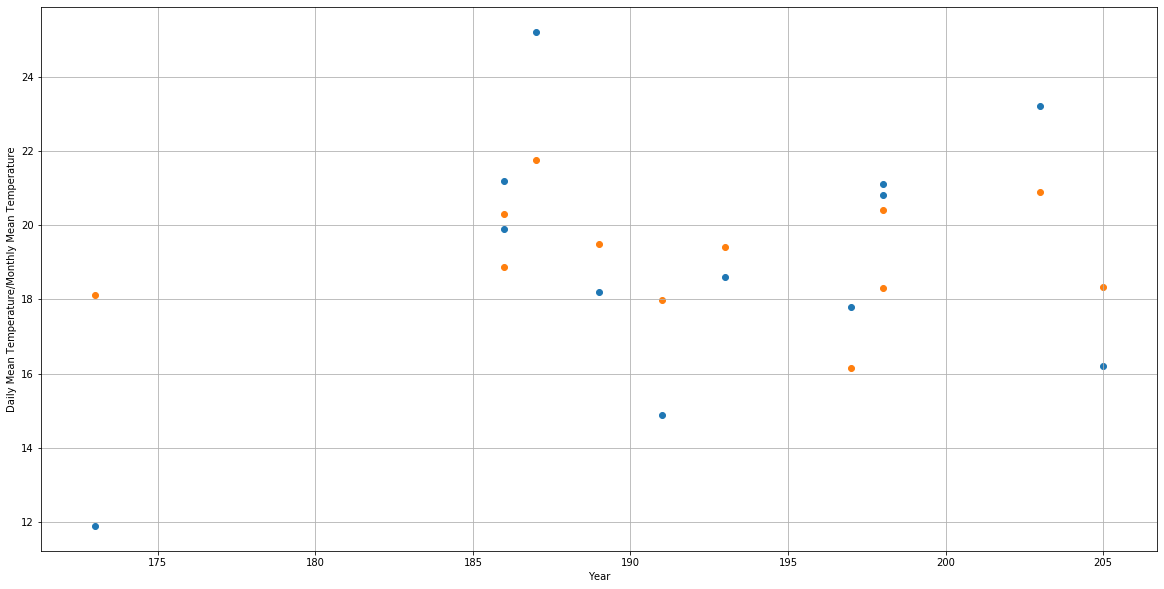

In [128]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(df_harvest.day, df_harvest.tg)
ax.set_xlabel("Year")
ax.set_ylabel("Daily Mean Temperature/Monthly Mean Temperature")
ax.scatter(df_harvest.day, df_harvest.monthly_mean)
#ax.scatter(df_harvest.year, df_harvest.day)
plt.grid()
plt.show();

In [84]:
fig.savefig(os.path.join(p_cwd, "output","images","temperature_data_winterbarley_harvest.jpg"), dpi=300,
        orientation='portrait')

In [85]:
X=df_harvest.drop(['day'], axis=1)

In [86]:
y=df_harvest['day']

In [87]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [88]:
model.summary()

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    day   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     2.484
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.135
Time:                        18:12:43   Log-Likelihood:                -38.680
No. Observations:                  12   AIC:                             85.36
Df Residuals:                       8   BIC:                             87.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2982.1171   1436.834      2.075      0.072    -331.227    6295.462
year            -1.3891      0.722     -1.925      0.090      -3.053       0.275
tg               0.9740      0.952      1.023      0.336      -1.221       3.169
monthly_mean    -0.6076      2.423     -0.251      0.808      -6.195       4.979
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.915
Skew:                           0.629   Prob(JB):                        0.633
Kurtosis:                       2.504   Cond. No.                     1.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
model2 = sm.GLSAR(y, X, rho=2)
res = model2.iterative_fit(maxiter=100)
res.summary()

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                    day   R-squared:                       0.745
Model:                          GLSAR   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     5.841
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0326
Time:                        18:12:43   Log-Likelihood:                -30.348
No. Observations:                  10   AIC:                             68.70
Df Residuals:                       6   BIC:                             69.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3472.1644   1404.019      2.473      0.048      36.653    6907.675
year            -1.6491      0.699     -2.360      0.056      -3.359       0.060
tg               1.2318      0.615      2.004      0.092      -0.272       2.736
monthly_mean     0.8828      1.892      0.467      0.657      -3.746       5.512
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   2.454
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.783
Skew:                           0.456   Prob(JB):                        0.676
Kurtosis:                       1.977   Cond. No.                     1.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
X_=df_harvest.drop(['day','tg','monthly_mean'], axis=1)

In [91]:
y

1     198
6     197
10    205
16    203
22    186
28    187
34    189
40    193
46    173
52    186
58    191
64    198
Name: day, dtype: int64

In [92]:
model2 = sm.GLSAR(y, X_, rho=2)
X_ = sm.add_constant(X_)
res = model2.iterative_fit(maxiter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                GLSAR Regression Results                               
=======================================================================================
Dep. Variable:                    day   R-squared (uncentered):                   0.996
Model:                          GLSAR   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2036.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    6.45e-12
Time:                        18:12:54   Log-Likelihood:                         -35.464
No. Observations:                  10   AIC:                                      72.93
Df Residuals:                       9   BIC:                                      73.23
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0950      0.002     45.122      0.000       0.090       0.100
==============================================================================
Omnibus:                        5.259   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                1.923
Skew:                          -1.029   Prob(JB):                        0.382
Kurtosis:                       3.620   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
round(regr.score(X,y),3)

In [ ]:
i = regr.intercept_.round(3)

In [ ]:
c= regr.coef_.round(3)

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.title("Winter Barley Harvest Data with superimposed linear regression model (scikit-learn)")
plt.grid()
sns.scatterplot(x=df_harvest['year'],y=df_harvest['day_year'], hue=df['lat']);
sns.lineplot(x=df_harvest['year'],y=i+c[0]*df_harvest['year'], c='cornflowerblue');

In [ ]:
mu = np.mean(y)
mu

In [ ]:
sample=df_harvest[df_harvest['year']>=2000]['day_year'].to_list()
sample_mean=np.mean(np.array(sample))
sample_mean

In [ ]:
sample_sd = np.std(np.array(sample))
sample_sd 

In [ ]:
sigma = np.std(y)
sigma

In [ ]:
z_stat = (sample_mean-mu)/(sigma/np.sqrt(np.size(np.array(sample))))

In [ ]:
z_stat 

Significant at alpha=0.1 https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html

In [ ]:
# With Statsmodels

import statsmodels.api as sm
X = df_harvest[['year']]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
robust = sm.OLS(y,X).fit().get_robustcov_results(cov_type='HAC', maxlags=10)
robust.summary()

In [ ]:
a = robust.params
print(a[0])
print(a[1])

In [ ]:
model2 = sm.GLSAR(y, X, rho=2)
res = model2.iterative_fit(maxiter=100)
res.summary()

In [ ]:
a_glsar = res.params
a_glsar

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.title("Winter Barley Harvest Data with superimposed regression models (Scikit-Learn, Statsmodels)")
plt.grid()
sns.scatterplot(x=df_harvest['year'],y=df_harvest['day_year'], hue=df['lat']);
sns.lineplot(x=df_harvest['year'],y=a[0]+a[1]*df_harvest['year'], c='darkgray');
sns.lineplot(x=df_harvest['year'],y=a_glsar[0]+a_glsar[1]*df_harvest['year'], c='fuchsia')
sns.lineplot(x=df_harvest['year'],y=i+c[0]*df_harvest['year'], c='cornflowerblue');

In [ ]:
lst_years = sorted(df_harvest['year'].unique().tolist())
numbers = [i for i in range (1,69,1)]
years_dict = dict(zip(lst_years,numbers))
df_test = df_harvest.replace({'year':years_dict})
df_test

In [ ]:
X_test = df_test['year']
y_test=np.array(df_test['day_year'])
X_test = sm.add_constant(X_test)
model_test = sm.OLS(y_test,X_test).fit()
model_test.summary()

In [ ]:
model2ts = sm.GLSAR(y_test, X_test, rho=2)
rests = model2ts.iterative_fit(maxiter=100)
rests.summary()